# Gradient Descent

Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

## Theoratical Aspects
The idea behind the this approach is to try an minimize the in-sample error $E_{\text{in}}$,the average of the loss function $L$ over the training data, which in turn minimizes the out-of-sample error $E_{\text{out}}$, the average of the loss function over the test data.
We define the in-sample error as the Sum of Squared Errors (SSE) over the training data:
$$
E_{\text{in}} = \frac{1}{N} \sum_{n=1}^{N} [f(X_i) - h(X_i)]^2
$$

In order to inform the model on the correctness of it's predictions, we need to define an activation function $\Phi$, which is a function that maps the output of the model to a value that can be compared to the target value. This function is usually the identity function, which is defined as:
$$
\Phi(x) = x \implies h(X_i) = \Phi(X_i) = w^T X_i = X_i w
$$
Using this function, we can define the in-sample error as:
$$
E_{\text{in}} = \frac{1}{N} \sum_{n=1}^{N} [y_i - w^T X_i]^2
$$


The following questions arise: how can we choose the best weights $w$ that minimize the in-sample error?

Suppose the hypothesis $h$ is a quadratic function of the form: $h(X) = X^2$. We can take the first derivative of the in-sample error with respect to the weights $w$ and set it to zero to find the optimal weights that minimize the in-sample error. 

By observing the plot of the in-sample error, we can see that it is a convex function, which means that it has a single minimum. This minimum is the optimal weights that minimize the in-sample error.

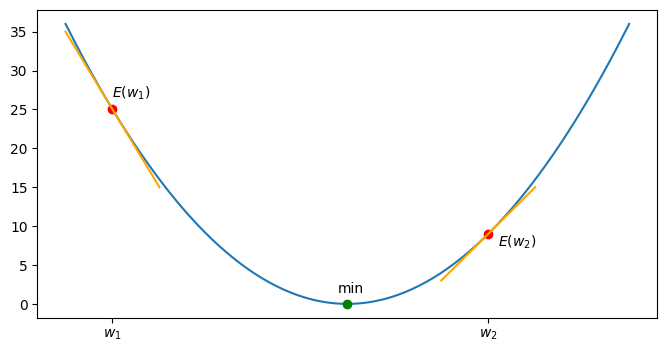

In [93]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 240)
y = x**2

plt.figure(figsize=(8, 4))
plt.plot(x,y)

plt.xticks([-5, 3],['$w_1$', '$w_2$'])
plt.plot([-5, 3], [25, 9], 'ro')

# label points in the curve
plt.text(-5, 26, '$E(w_1)$', ha='left', va='bottom')
plt.text(3.2, 6.8, '$E(w_2)$', ha='left', va='bottom')

# insert min error
plt.plot([0], [0], 'go')
plt.text(- 0.2, 1, 'min', va='bottom')

# plot derivative
x = np.linspace(-6, -4, 50)
plt.plot(x, -10 * x - 25, color = "orange")

x = np.linspace(2, 4, 50)
plt.plot(x, 6 * x - 9, color = "orange")


By observing the plot we can guess that update rule for the weights is:
$$
w_\text{new} = w_\text{old} - \eta \nabla E_{\text{in}}(w)
$$
where $\eta$ is the learning rate, which is a hyperparameter that controls the step size of the gradient descent algorithm.

If the gradient is positive, then the weights are too small and we need to increase them. If the gradient is negative, then the weights are too large and we need to decrease them.
The closer the weights are to the optimal weights, the smaller the gradient will be.

### Local Minima Problem

Using the gradient may also lead to a local minima instead of the global minima. This is because the gradient only gives us the direction of the steepest descent, but it does not guarantee that we will reach the global minima. This is why we need to initialize the weights randomly and run the gradient descent algorithm multiple times to find the global minima.

Here is an example to illustrate this point. Suppose we have a function $f(x) = x^4 - 6x^2 -3x$. The global minima of this function is at  . If we initialize the weights at $w > 2$, then the gradient descent algorithm will converge to the global minima instead of the local minima;

Text(1.65, -13.37, 'global minima')

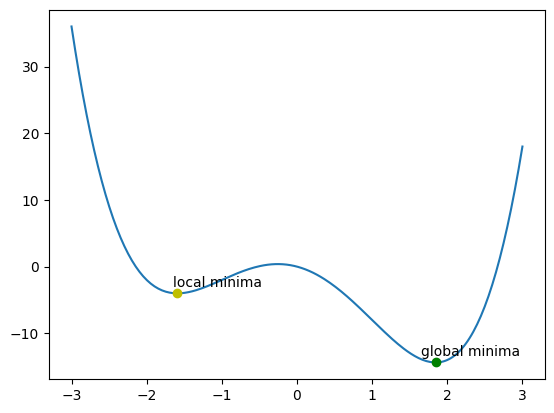

In [94]:
x = np.linspace(-3, 3, 240)
y = (x**4) - (6 * x**2) - (3 * x)

plt.plot(x, y)

# insert local minima
plt.plot([-1.59], [-4], 'yo')
plt.text(-1.65, -3, 'local minima')

# insert absolute minima
plt.plot([1.85], [-14.37], 'go')
plt.text(1.65, -13.37, 'global minima')


## Computing the Gradie of the In-Sample Error $\nabla E_{\text{in}}$

Given:
$$
E_{\text{in}} = \frac{1}{N} \sum_{n=1}^{N} [y_i - w^T X_i]^2
$$
we can compute the gradient of the in-sample error with respect to the weights $w$ as follows:
$$
\frac{\partial}{\partial w_j} E_{\text{in}} = 
\frac{\partial}{\partial w_j} \left[\frac{1}{N} \sum_{n=1}^{N} [y_i - w^T X_i]^2\right] =
\frac{2}{N} \sum_{n=1}^{N} [y_i - w^T X_i] (-X_i^j)
$$

Exploiting:
$$
\begin{aligned}
w^T X_i &= [w_1, w_2, \ldots, w_D]^T [X_i^1, X_i^2, \ldots, X_i^D] \\
        &= w_1 X_i^1 + w_2 X_i^2 + \ldots + w_D X_i^D \\
        &\to \text{scalar}:  (1 \times D )\times (D \times 1) = 1 \times 1
\end{aligned}
$$
we get:

$$
\sum_{i = 0} ^{N} (y_i - w^T X_i) = y - w^T X \to N \times 1\\
\implies \frac{2}{N}\sum_{i = 0}^N \left( y_i - w^TX_i \right)\left( -X_i^j \right) = -X^T (y - w^TX) \to d \times 1
$$

### Update rule
The update rule for the weights is:
$$
\begin{aligned}
w_{\text{new}} &= w_{\text{old}} - \eta \nabla E_{\text{in}}(w)\\
&= w_{\text{old}} + \eta X^T (y - w^T X)
\end{aligned}
$$

### Visualization

The following plot shows the behavior of the gradient descent algorithm during training, where the weights are updated iteratively until the in-sample error converges to the optimal weights that minimize the in-sample error.

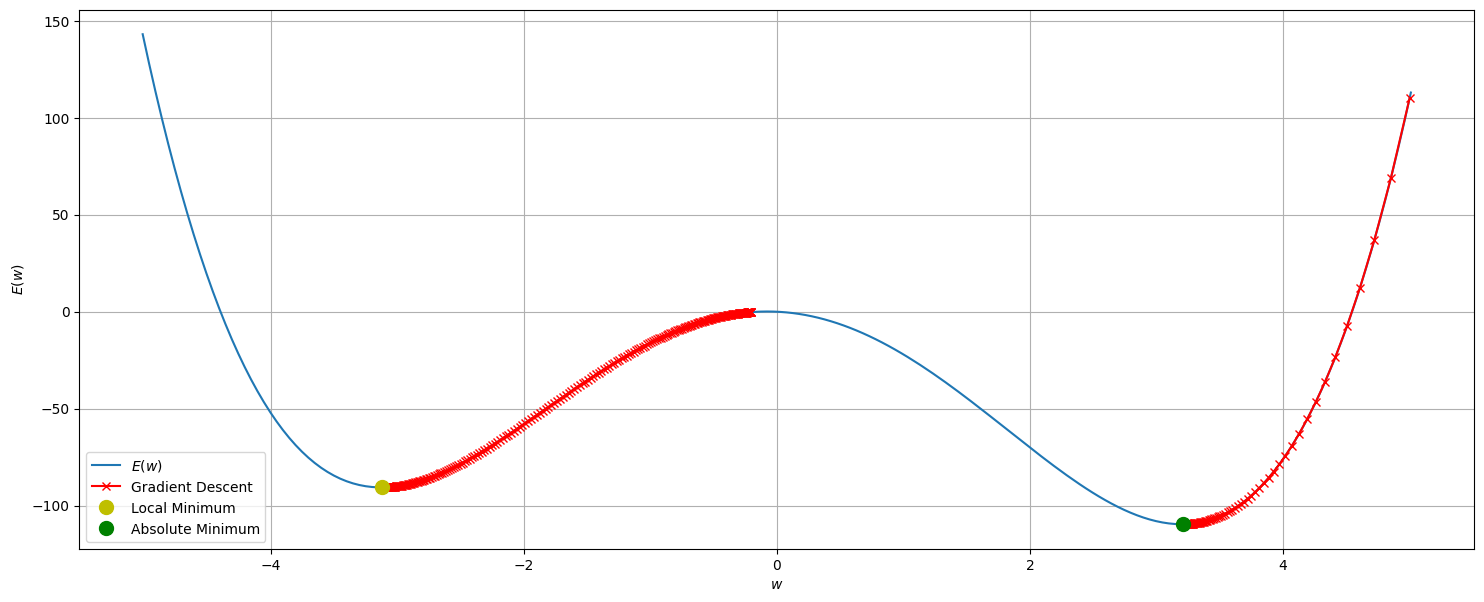

In [95]:
# function and its derivative
def f(x):
    return (x**4) - (20 * x**2) - (3 * x)

def df(x):
    return 4 * (x ** 3) - 40 * x - 3

# gradient descent plotting function
def gradient_descent(x_init, learning_rate, num_iters):
    x_history = [x_init]
    for i in range(num_iters):
        x = x_history[-1]
        x_new = x - learning_rate * df(x)
        x_history.append(x_new)
    return x_history

# initial parameters
learning_rate = 5e-4
num_iters = 100

# first plot
plt.figure(figsize=(18, 7))

# plot the error function 
x_vals = np.linspace(-5.01, 5.01, 200)
plt.plot(x_vals, f(x_vals), label='$E(w)$')



# GD for local minimum
x_init = -0.2
x_history = gradient_descent(x_init, learning_rate, 3 * num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-', label='Gradient Descent')

# insert local minima
min = x_history[-1]
plt.plot(min, f(min), 'yo', markersize=10, label='Local Minimum')



# GD for absolute minima
x_init = 5
x_history = gradient_descent(x_init, learning_rate, num_iters)
plt.plot(x_history, [f(x) for x in x_history], 'rx-')

# insert absolute minima
min = x_history[-1]
plt.plot(min, f(min), 'go', markersize=10, label='Absolute Minimum')


# general settings
plt.xlabel('$w$')
plt.ylabel('$E(w)$')
plt.legend()
plt.grid()

# TODO: Add derivation of closed form and iterative form

# Gradient Descent Algorithm

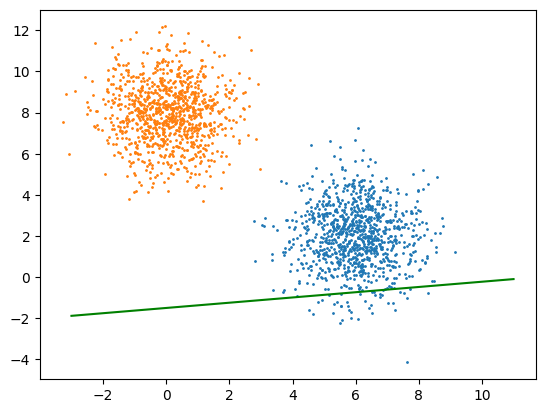

In [137]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

# generate N samples per class
N = 1000


# feature 1 and 2 for class 1
x11 = np.random.normal(loc = 6, scale = 1, size = N)
x12 = np.random.normal(loc = 2, scale = 1.5, size=N)

# generate class 1 labels
Y1 = np.ones(N)

# plot class 1
plt.scatter(x11, x12, s = 1)


# second components of x1 and x2
x21 = np.random.normal(loc = 0, scale = 1, size = N)
x22 = np.random.normal(loc = 8, scale = 1.5, size = N)

# generate class 2 labels
Y2 = -np.ones(N)

# plot class 2
plt.scatter(x21, x22 ,s = 1)


# generates weight 
w = np.random.normal(loc=0.1, size=3)

plot_range = range(int(np.min([np.min(x11), np.min(x21)])), int(np.max([np.max(x12), np.max(x22)])))
plt.plot(plot_range, line(w, plot_range), color = 'g', label = 'initial line')

# generate bias feature
x0 = np.ones(N * 2)

# create feature 1 and 2
x1 = np.concatenate((x11, x21))
x2 = np.concatenate((x12, x22))

# create dataset
X = np.stack((x0, x1, x2), axis=1)

# create label vector
y = np.concatenate((Y1, Y2))

### Error function
The error function is defined as the sum of squared errors over the training data:
$$
E_{\text{in}} = \frac{1}{2} \sum_{n=1}^{N} [e_i]^2
$$

In [162]:
def error_sse(errors):
    errors = np.sum(np.square(errors)) / 2
    return errors

### Training
We initialize $\eta$ and the weights $w$, and `max_epochs` to appropriate values. 

In [163]:
# learning rate
eta = 1e-4

# epochs
max_epochs = 1000
current_epoch = 0

# sum of squared errors per epoch
squared_errors_epoch = np.zeros(max_epochs)

The activation function $\Phi$ is the identity function, which is defined as:
$$
\Phi(x) = x \implies h(X_i) = \Phi(X_i) = w^T X_i = X_i w
$$

while the weight vector $w$ is updated according to the update rule:
$$
w_{\text{new}} = w_{\text{old}} + \eta X^T (y - w^T X)
$$

In [176]:
for _ in range(max_epochs):
  output = np.dot(X, w)
  errors = y - output
  squared_errors_epoch[current_epoch] = error_sse(errors)
  print(squared_errors_epoch[current_epoch])
  w +=  (2/X.shape[0]) * eta * np.dot(np.transpose(X), errors)

141.91338356405097
141.91216993873815
141.91095633575873
141.90974275511218
141.90852919679827
141.90731566081647
141.90610214716637
141.90488865584763
141.9036751868598
141.90246174020243
141.90124831587514
141.90003491387756
141.89882153420922
141.8976081768697
141.8963948418587
141.89518152917566
141.89396823882026
141.89275497079205
141.8915417250907
141.89032850171566
141.88911530066662
141.88790212194317
141.88668896554483
141.88547583147124
141.884262719722
141.88304963029668
141.88183656319484
141.88062351841614
141.87941049596012
141.87819749582636
141.87698451801447
141.87577156252405
141.87455862935468
141.8733457185059
141.87213282997737
141.87091996376864
141.86970711987934
141.86849429830903
141.86728149905727
141.8660687221237
141.86485596750788
141.86364323520945
141.8624305252279
141.86121783756292
141.86000517221404
141.85879252918085
141.85757990846298
141.85636731006
141.85515473397146
141.853942180197
141.85272964873622
141.85151713958865
141.8503046527539
141.8490

Please note that most of the points are labelled correctly, while a minority of the points are misclassified. This is because the closer the model gets to the solution, the harder the hyperplane is to rotate properly due to the fact that the gradient is extremely close to zero.

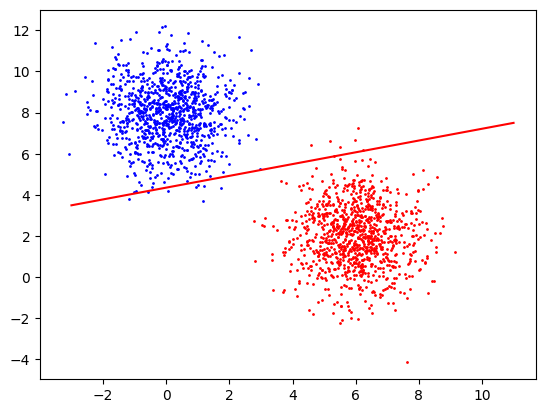

In [173]:
plt.scatter(X1_1, X1_2, color = 'red', label = 'class 1', s = 1)
plt.scatter(X2_1, X2_2, color = 'blue', label = 'class 2', s = 1)
plt.plot(plot_range, line(w, plot_range), color = 'r', label = 'final line')


Plotting the SSE over the epochs, we can see that the error decreases over time until it converges to the optimal weights that minimize the in-sample error.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


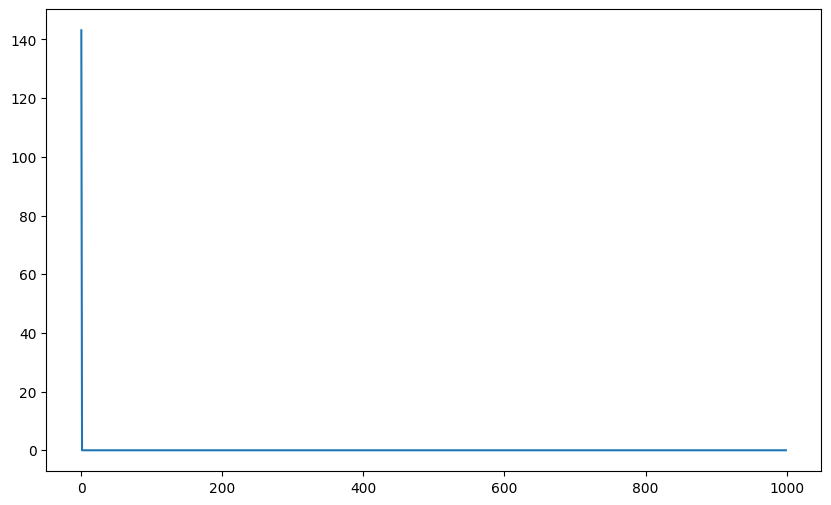

In [174]:
print(squared_errors_epoch[-10:])
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), squared_errors_epoch)